In [30]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [32]:
def driver_signal_1(time):
    import numpy as np
    
    sin = np.sin
    q   = 2.0*np.pi
    
    A0 = 0.2  #-0.1 
    A1 = 0.0  #0.1
    A2 = 0.0  #0.05
    A3 = 0.0  #0.01
    A4 = 0.0  #0
    
    f0 = 0.2
    f1 = 2.4
    f2 = 3.8
    f3 = 10.6
    f4 = 19.2
    
    return  A0*sin(f0*q*time) + A1*sin(f1*q*time) + A2*sin(f2*q*time) + A3*sin(f3*q*time) + A4*sin(f4*q*time)

In [33]:
def DSHO(state,time,m,k,driver):
    import numpy as np
    
    w0 = np.sqrt(k/m)
    if driver != 0:
        F  = driver(time)
        f  = F/m
    else:
        f  = 0
    
    return [state[1],-w0**2*state[0] + f]

In [34]:
time = np.arange(0,50,0.01)

In [35]:
sig = driver_signal_1(time)

<IPython.core.display.Javascript object>


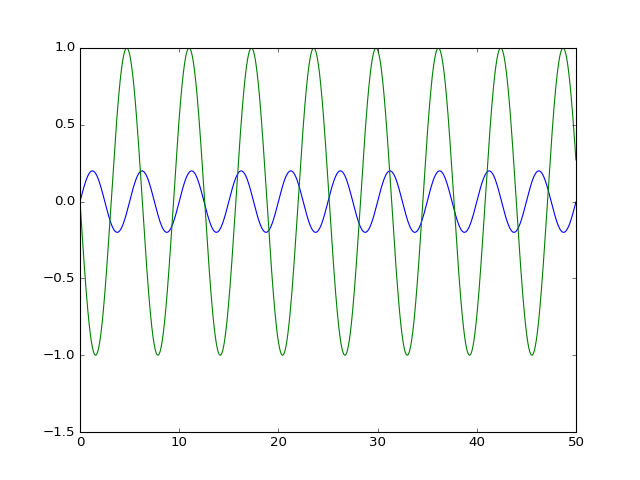

In [36]:
%matplotlib notebook
plt.plot(time,sig)

In [10]:
S0 = np.array([1,0])

In [37]:
soln = sp.integrate.odeint(DSHO,S0,time,args=(0.1,0.1,0))#driver_signal_1))

In [38]:
plt.plot(time,soln[:,1])